In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyecharts.charts import Map
from pyecharts import options as opts
import squarify
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
plt.rcParams['font.sans-serif'] = ['Songti SC']
plt.rcParams['axes.unicode_minus'] = False  #用来正常显示负号

In [5]:
df = pd.read_excel('../超市.xls')
city = ['北京','上海','重庆','天津']
self_domain = ['内蒙古','广西','西藏','新疆','宁夏']
self_name = ['内蒙古自治区','广西壮族自治区','西藏自治区','新疆维吾尔自治区','宁夏回族自治区']

row, col = df.shape  #获取excel文件中除第一行外的行和列数

province = {} # 各省份的订单量
province_time = {} # 各省份不同年度的订单量
profit = {}
profit_time = {}
region = {}
category = {}
category_big = {}

# 统计各省份的消费群体属于公司、消费者以及小型企业的数量
province_company = {}
province_customer = {}
province_enterprice = {}

# 统计各省份的消费类别属于办公用品、家具以及技术的数量
province_work = {}
province_tech = {}
province_house = {}

# 统计不同类别的消费群体属于公司、消费者以及小型企业的数量
category_company = {}
category_customer = {}
category_enterprice = {}
category_list = [category_company, category_customer, category_enterprice]
category_key = ['公司','消费者','小型企业']

#统计不同类别基于时间的销售数量和利润变化规律
category_time = {}

In [17]:
# 基于省份的处理表格数据
for i in range(row):
    time = int( str(df['订单日期'][i])[0:4] )
    m = str( df['利润'][i] )
    if len( m.split(',') ) == 1:
        m = int(m)
    else:
        m = int( m.split(',')[0] + m.split(',')[1] )
        
    if df['省/自治区'][i] not in province: 
        province[ df['省/自治区'][i] ] = 1
        province_time[ df['省/自治区'][i] ] = [0,0,0,0]
        province_time[ df['省/自治区'][i] ][ time-2013 ] = 1  #2013年对应下标0位置
        profit[ df['省/自治区'][i] ] = m
        profit_time[ df['省/自治区'][i] ] = [0,0,0,0]
        profit_time[ df['省/自治区'][i] ][ time-2013 ] = m
        
        if df['地区'][i] not in region:
            region[ df['地区'][i] ] = []
        region[ df['地区'][i] ].append( df['省/自治区'][i] )
        
        if df['细分'][i] == '公司':
            province_company[ df['省/自治区'][i] ] = 1
        elif df['细分'][i] == '消费者':
            province_customer[ df['省/自治区'][i] ] = 1
        else:
            province_enterprice[ df['省/自治区'][i] ] = 1
            
        if df['类别'][i] == '办公用品':
            province_work[ df['省/自治区'][i] ] = 1
        elif df['类别'][i] == '技术':
            province_tech[ df['省/自治区'][i] ] = 1
        else:
            province_house[ df['省/自治区'][i] ] = 1
            
            
    else: 
        province[ df['省/自治区'][i] ] += 1
        province_time[ df['省/自治区'][i] ][ time-2013 ] += 1
        profit[ df['省/自治区'][i] ] += m
        profit_time[ df['省/自治区'][i] ][ time-2013 ] += m
        
        if df['细分'][i] == '公司':
            if df['省/自治区'][i] not in province_company:
                province_company[ df['省/自治区'][i] ] = 1
            else:
                province_company[ df['省/自治区'][i] ] += 1
        elif df['细分'][i] == '消费者':
            if df['省/自治区'][i] not in province_customer:
                province_customer[ df['省/自治区'][i] ] = 1
            else:
                province_customer[ df['省/自治区'][i] ] += 1
        else:
            if df['省/自治区'][i] not in province_enterprice:
                province_enterprice[ df['省/自治区'][i] ] = 1
            else:
                province_enterprice[ df['省/自治区'][i] ] += 1
            
            
        if df['类别'][i] == '办公用品':
            if df['省/自治区'][i] not in province_work:
                province_work[ df['省/自治区'][i] ] = 1
            else:
                province_work[ df['省/自治区'][i] ] += 1
        elif df['类别'][i] == '技术':
            if df['省/自治区'][i] not in province_tech:
                province_tech[ df['省/自治区'][i] ] = 1
            else:
                province_tech[ df['省/自治区'][i] ] += 1
        else:
            if df['省/自治区'][i] not in province_house:
                province_house[ df['省/自治区'][i] ] = 1
            else:
                province_house[ df['省/自治区'][i] ] += 1
                
    if df['子类别'][i] not in category:
        category[ df['子类别'][i] ] = df['利润'][i]
    else:
        category[ df['子类别'][i] ] += df['利润'][i]
        
    if df['类别'][i] not in category_big:
        category_big[ df['类别'][i] ] = df['利润'][i]
    else:
        category_big[ df['类别'][i] ] += df['利润'][i]

In [4]:
#基于类别的处理
for i in range(row):
    key = df['细分'][i]
    index = category_key.index(key)
    category = df['类别'][i]
    keys = list(category_list[index].keys())
    if category not in keys:
        category_list[index][category] = 1
    else:
        category_list[index][category] += 1

In [53]:
#地图数据处理
for i in range(row):
    #名字转换
    p_key = df['省/自治区'][i]
    if p_key in city:
        p_key += "市"
    elif p_key in self_domain:
        index = self_domain.index(p_key)
        p_key = self_name[index]
    else:
        p_key += "省"
    
    #计数
    if p_key not in province:
        province[p_key] = 1
    else:
        province[p_key] += 1

orderMap = Map()
orderMap.set_global_opts(visualmap_opts=opts.VisualMapOpts(max_=1000))
orderMap.add(
    "Number of Deal Records",
    list(province.items()),
    maptype = "china",
    is_map_symbol_show = False
).set_series_opts(label_opts=opts.LabelOpts(is_show = False))
orderMap.render('orderMap.html')

Text(0.5, 1.0, '地区-省份利润图')

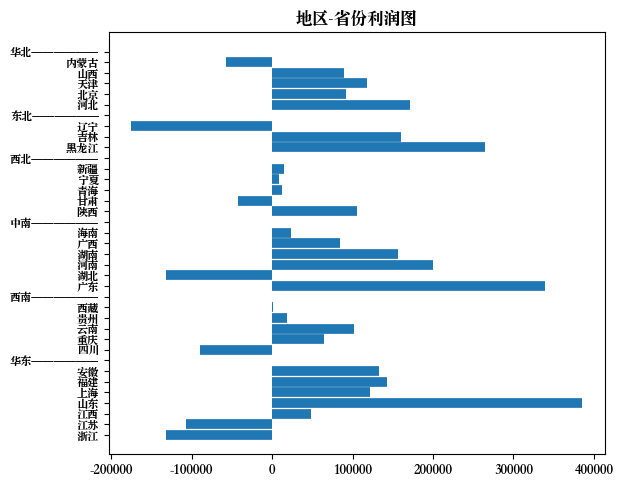

In [56]:
# 地区-省份利润图
x_list = []
y_list = []
for each in region.keys():
    y = region[each]#地区对应的省份列表
    for ea in y:
        y_list.append(ea)
        x_list.append(profit[ea])
    y_list.append(each+'——————')
    x_list.append(0)
    
plt.figure()
plt.hlines(y = y_list,xmin = 0,xmax = x_list,linewidth = 7)
plt.subplots_adjust(bottom=0.001)  # 调整标签间距
plt.yticks(fontsize=8)  # 调整字号
plt.title('地区-省份利润图')

(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

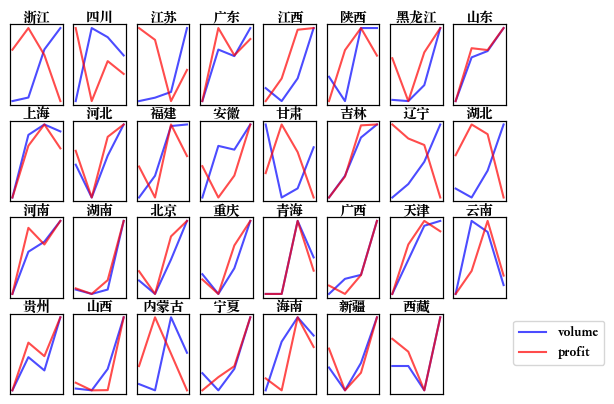

In [57]:
# 绘制各省份的订单量-利润图
i = 1
x = ['2013','2014','2015','2016']
plt.figure()
for each in province_time.keys():
    plt.subplot(4,8,i)
    plt.plot(x,province_time[each],color = 'blue',alpha = 0.7,label = 'volume')
    plt.yticks([])
    plt.twinx().plot(x,profit_time[each],color = 'red',alpha = 0.7,label = 'profit')
    plt.title(each,fontsize = 10, pad=2)
    plt.yticks([])
    plt.xticks([])
    i += 1    
# 右下角绘制图例
plt.subplot(4,8,32)
plt.plot(0,0,color = 'blue',alpha = 0.7,label = 'volume')
plt.plot(0,0,color = 'red',alpha = 0.7,label = 'profit')
plt.legend(bbox_to_anchor=(1, 1))
plt.axis('off')

In [13]:
df

,订单 Id,利润率,记录数,制造商,产品名称,利润,发货日期,国家,地区,城市,子类别,客户名称,折扣,数量,省/自治区,类别,细分,订单日期,邮寄方式,销售额
0,US-2015-1357144,-0.47,1,Fiskars,"Fiskars 剪刀, 蓝色",-61,2016-04-29,中国,华东,杭州,用品,曾惠,0.4,2,浙江,办公用品,公司,2016-04-27,二级,130
1,CN-2015-1973789,0.34,1,GlobeWeis,"GlobeWeis 搭扣信封, 红色",43,2016-06-19,中国,西南,内江,信封,许安,0.0,2,四川,办公用品,消费者,2016-06-15,标准级,125
2,CN-2015-1973789,0.13,1,Cardinal,"Cardinal 孔加固材料, 回收",4,2016-06-19,中国,西南,内江,装订机,许安,0.4,2,四川,办公用品,消费者,2016-06-15,标准级,32
3,US-2015-3017568,-0.08,1,Kleencut,"Kleencut 开信刀, 工业",-27,2016-12-13,中国,华东,镇江,用品,宋良,0.4,4,江苏,办公用品,公司,2016-12-09,标准级,321
4,CN-2014-2975416,0.40,1,KitchenAid,"KitchenAid 搅拌机, 黑色",550,2015-06-02,中国,中南,汕头,器具,万兰,0.0,3,广东,办公用品,消费者,2015-05-31,二级,1376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9930,CN-2015-4318875,-0.33,1,SanDisk,"SanDisk 记忆卡, 实惠",-315,2016-06-02,中国,华东,义乌,配件,巩光,0.4,3,浙江,技术,消费者,2016-05-28,标准级,944
9931,CN-2015-4318875,0.08,1,Eldon,"Eldon 盘, 蓝色",36,2016-06-02,中国,华东,义乌,收纳具,巩光,0.0,2,浙江,办公用品,消费者,2016-05-28,标准级,448
9932,CN-2015-4318875,-0.37,1,Safco,"SAFCO 折叠椅, 红色",-88,2016-06-02,中国,华东,义乌,椅子,巩光,0.4,1,浙江,家具,消费者,2016-05-28,标准级,240
9933,CN-2015-4318875,-0.33,1,罗技,"罗技 路由器, 耐用",-1617,2016-06-02,中国,华东,义乌,配件,巩光,0.4,7,浙江,技术,消费者,2016-05-28,标准级,4852


Text(0.5, 1.0, '不同类别商品的利润')

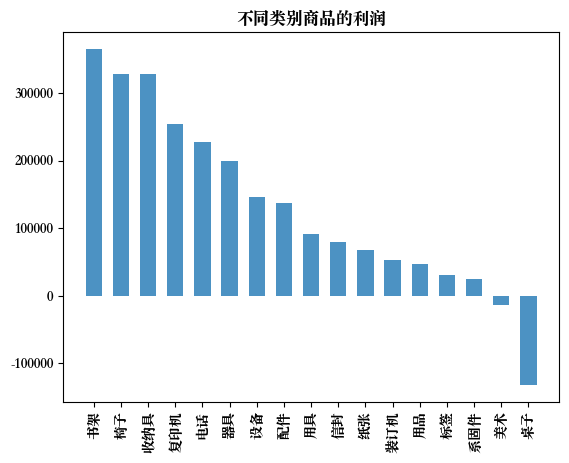

In [19]:
# 不同类别商品的购买频率
catagory_p= sorted( category.items(),key = lambda x:x[1],reverse = True )
names_catagory = []
values_catagory = []
for each in catagory_p:
    names_catagory.append(each[0])
    values_catagory.append(each[1])
plt.figure()
plt.bar( names_catagory,values_catagory,alpha = 0.8,width = 0.6 )
plt.xticks(rotation=90)
plt.title('不同类别商品的利润')

Text(0.5, 1.0, '各省份的消费群体')

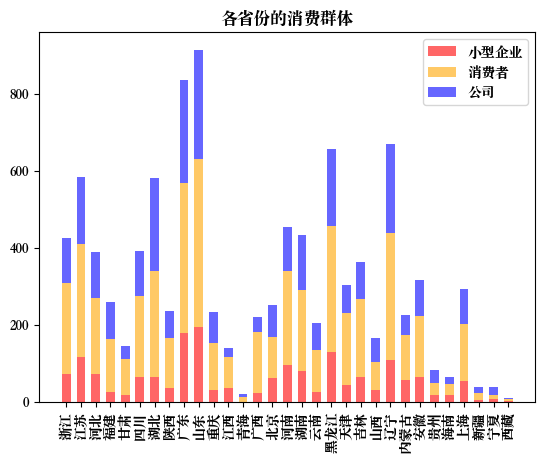

In [61]:
# 各省份的消费群体属于公司、消费者以及小型企业的情况
company = []
customer = []
enterprice = []
for each in province_company.keys() :
    company.append(province_company[each])
    customer.append(province_customer[each])
    if each == '青海':  #青海的消费群体中没有小型企业
        enterprice.append(0)
    else:
        enterprice.append(province_enterprice[each])
company = np.array(company)
enterprice = np.array(enterprice)
customer = np.array(customer)
width = 0.6
plt.figure()
plt.bar(province_company.keys() ,enterprice,width,color='red',alpha=0.6,label='小型企业')
plt.bar(province_company.keys() ,customer,width,bottom=enterprice,color='orange',alpha=0.6,label='消费者')
plt.bar(province_company.keys() ,company,width,bottom=(enterprice+customer),color='blue',alpha=0.6,label='公司')
plt.legend()
plt.xticks(rotation=90)
plt.title('各省份的消费群体')

Text(0.5, 1.0, '各类别商品的消费群体')

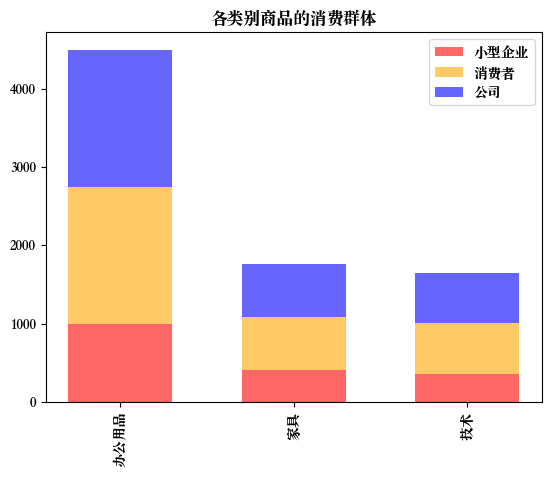

In [5]:
# 各类别的消费群体属于公司、消费者以及小型企业的情况
company = []
customer = []
enterprice = []
for each in category_company.keys() :
    company.append(category_company[each])
    customer.append(category_company[each])
    enterprice.append(category_enterprice[each])
company = np.array(company)
enterprice = np.array(enterprice)
customer = np.array(customer)
width = 0.6
plt.figure()
plt.bar(category_company.keys() ,enterprice,width,color='red',alpha=0.6,label='小型企业')
plt.bar(category_company.keys() ,customer,width,bottom=enterprice,color='orange',alpha=0.6,label='消费者')
plt.bar(category_company.keys() ,company,width,bottom=(enterprice+customer),color='blue',alpha=0.6,label='公司')
plt.legend()
plt.xticks(rotation=90)
plt.title('各类别商品的消费群体')

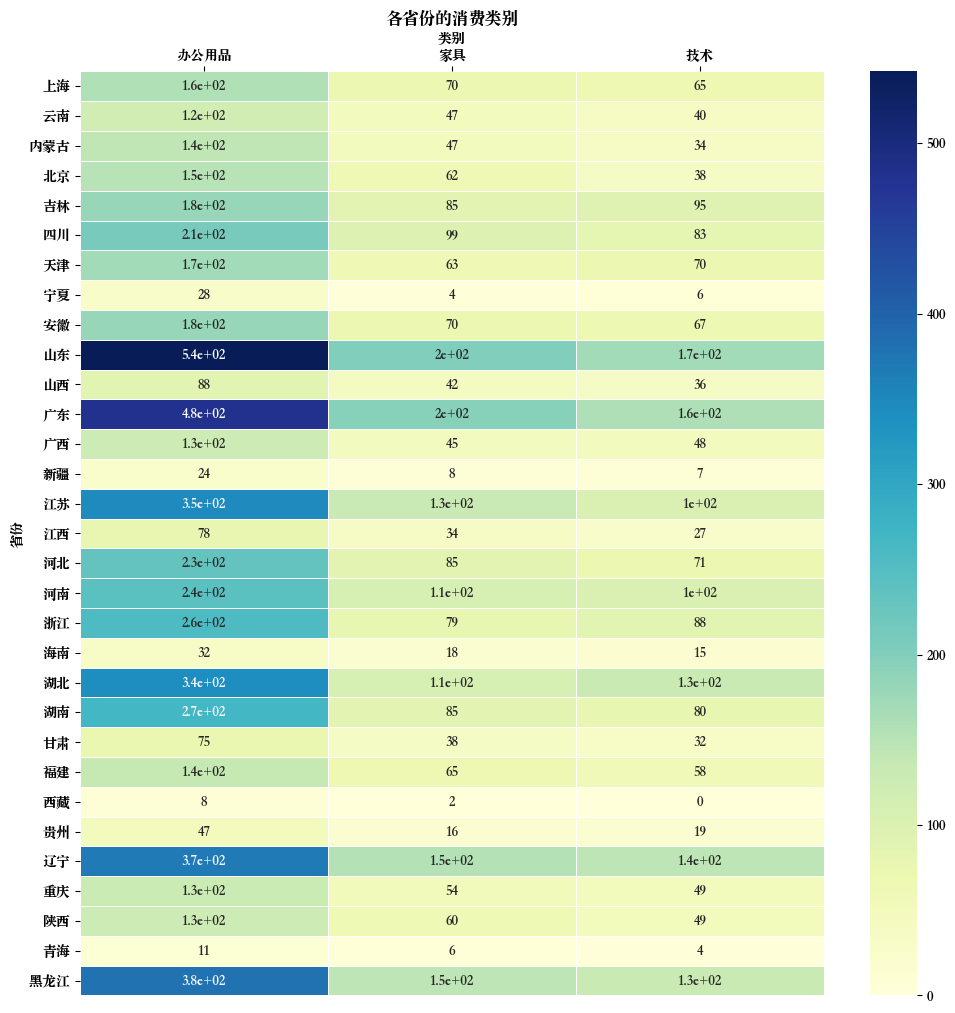

In [73]:
# 统计各省份的消费类别属于办公用品、家具以及技术的情况
classification = ['办公用品','技术','家具']
work = []
tech = []
house = []
for each in province_work.keys():
    work.append(province_work[each])
    house.append(province_house[each])
    if each == '西藏':
        tech.append(0)
    else:
        tech.append(province_tech[each])

province_index = np.repeat( list(province_work.keys()),3 )  #3个商品类别
classification_column = classification * len(province_work.keys())
work_tech_house = []
for i in range( len(province_work.keys()) ):
    work_tech_house.append(work[i])
    work_tech_house.append(tech[i])
    work_tech_house.append(house[i])
df_p = pd.DataFrame({'省份':province_index,'类别':classification_column,'数值':work_tech_house})
df_wide = df_p.pivot_table( index = '省份', columns = '类别', values = '数值' )

fig,ax = plt.subplots(figsize = (12,12))
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
sns.heatmap(
    df_wide,
annot = True,
    cmap = "YlGnBu",
    linecolor = 'white',
    linewidths = 0.5
)
plt.title('各省份的消费类别')
plt.savefig('./hi.jpg')
plt.show()
